# Make Gradient Plots

## Setup

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cptac
import numpy as np
import cnvutils

In [2]:
counts = pd.read_csv("cnv_counts.tsv", sep='\t', usecols=['Name', 'Database_ID', 'start_bp', 'end_bp', 'variable', 'value', 'cancer'])

In [3]:
reds = ['#FFFFFF', '#FDF0F0', '#FCE2E2', '#FAD3D3', '#F8C5C5', '#F6B6B6', '#F5A7A7', '#F39999', '#F18A8A', '#EF7B7B', '#EE6D6D', '#EC5E5E', '#EA5050', '#E84141', '#E73232', '#E52424', '#E31515']
blues = ['#FFFFFF', '#F2F0FD', '#E5E0FA', '#D7D1F8', '#CAC2F5', '#BDB2F3', '#B0A3F0', '#A393EE', '#9684EB', '#8875E9', '#7B65E6', '#6E56E4', '#6147E1', '#5437DF', '#4628DC', '#3918DA', '#2C09D7']
gradient = blues[::-1] + reds

## Prepare Table

In [4]:
gain_loss_counts = counts.pivot_table(index=['Name', 'Database_ID', 'cancer'], columns='variable')
gain_loss_counts.columns = gain_loss_counts.columns.to_flat_index()
gain_loss_counts = gain_loss_counts.drop(columns=('start_bp', 'gain'))
gain_loss_counts = gain_loss_counts.drop(columns=('end_bp', 'gain'))
gain_loss_counts = gain_loss_counts.rename(columns = {gain_loss_counts.columns[0]: 'end_bp', gain_loss_counts.columns[1]: 'start_bp', gain_loss_counts.columns[2]: 'gain', gain_loss_counts.columns[3]: 'loss'}, )

In [5]:
gain_loss_counts['length'] = gain_loss_counts.end_bp - gain_loss_counts.start_bp
gain_loss_counts['value'] = gain_loss_counts.gain - gain_loss_counts.loss
gain_loss_counts['bars'] = list(zip(gain_loss_counts.start_bp, gain_loss_counts.length))

## Map Colors

In [6]:
def map_color(val):
    i = (val + 85) // 5
    if i < 0:
        i = 0
    if i > 33:
        i=33
    return gradient[int(i)]

In [7]:
def map_reds(val):
    i = val // 5
    if i > 16:
        i = 16
    return reds[int(i)]

In [8]:
def map_blues(val):
    i = val // 5
    if i > 16:
        i = 16
    return blues[int(i)]

In [9]:
gain_loss_counts['color'] = gain_loss_counts.value.apply(map_color)
gain_loss_counts['red'] = gain_loss_counts.gain.apply(map_reds)
gain_loss_counts['blue'] = gain_loss_counts.loss.apply(map_blues)

In [10]:
gain_loss_counts.reset_index(inplace=True)

## Make the plots

<module 'matplotlib.pyplot' from 'C:\\Users\\chels\\anaconda3\\envs\\notebooks\\lib\\site-packages\\matplotlib\\pyplot.py'>

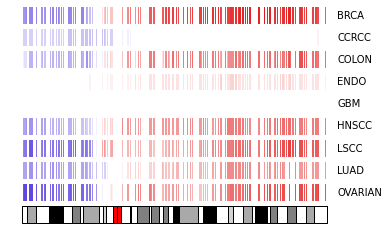

In [11]:
fig, ax = plt.subplots(nrows=10, sharex=True, sharey=False)
count = 0
for cancer in gain_loss_counts.cancer.unique():
    df = gain_loss_counts[gain_loss_counts.cancer == cancer]
    ax[count].broken_barh(df.bars, (0,1), facecolors=df.color)
    ax[count].text(np.max(df.start_bp)+5000000, 0.35, cancer)
    ax[count].set_frame_on(False)
    ax[count].get_xaxis().set_visible(False)
    ax[count].get_yaxis().set_visible(False)
    count += 1
cnvutils.make_chromosome_plot('8', ax=ax[count])

<module 'matplotlib.pyplot' from 'C:\\Users\\chels\\anaconda3\\envs\\notebooks\\lib\\site-packages\\matplotlib\\pyplot.py'>

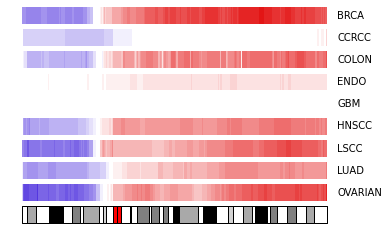

In [12]:
fig, ax = plt.subplots(nrows=10, sharex=True, sharey=False)
count = 0
for cancer in gain_loss_counts.cancer.unique():
    df = gain_loss_counts[gain_loss_counts.cancer == cancer]
    df = df.sort_values('start_bp')
    start_values = df.start_bp
    continuous_values = list()
    prev = 0
    for val in start_values:
        continuous_values.append((prev, val-prev))
        prev = val
    ax[count].broken_barh(continuous_values, (0,1), facecolors=df.color)
    ax[count].text(np.max(start_values)+5000000, 0.35, cancer)
    ax[count].set_frame_on(False)
    ax[count].get_xaxis().set_visible(False)
    ax[count].get_yaxis().set_visible(False)
    count += 1
cnvutils.make_chromosome_plot('8', ax=ax[count])

<module 'matplotlib.pyplot' from 'C:\\Users\\chels\\anaconda3\\envs\\notebooks\\lib\\site-packages\\matplotlib\\pyplot.py'>

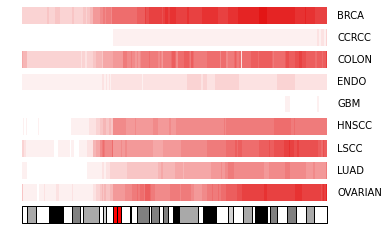

In [13]:
fig, ax = plt.subplots(nrows=10, sharex=True, sharey=False)
count = 0
for cancer in gain_loss_counts.cancer.unique():
    df = gain_loss_counts[gain_loss_counts.cancer == cancer]
    df = df.sort_values('start_bp')
    start_values = df.start_bp
    continuous_values = list()
    prev = 0
    for val in start_values:
        continuous_values.append((prev, val-prev))
        prev = val
    ax[count].broken_barh(continuous_values, (0,1), facecolors=df.red)
    ax[count].text(np.max(start_values)+5000000, 0.35, cancer)
    ax[count].set_frame_on(False)
    ax[count].get_xaxis().set_visible(False)
    ax[count].get_yaxis().set_visible(False)
    count += 1
cnvutils.make_chromosome_plot('8', ax=ax[count])

<module 'matplotlib.pyplot' from 'C:\\Users\\chels\\anaconda3\\envs\\notebooks\\lib\\site-packages\\matplotlib\\pyplot.py'>

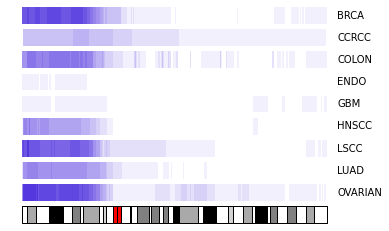

In [14]:
fig, ax = plt.subplots(nrows=10, sharex=True, sharey=False)
count = 0
for cancer in gain_loss_counts.cancer.unique():
    df = gain_loss_counts[gain_loss_counts.cancer == cancer]
    df = df.sort_values('start_bp')
    start_values = df.start_bp
    continuous_values = list()
    prev = 0
    for val in start_values:
        continuous_values.append((prev, val-prev))
        prev = val
    ax[count].broken_barh(continuous_values, (0,1), facecolors=df.blue)
    ax[count].text(np.max(start_values)+5000000, 0.35, cancer)
    ax[count].set_frame_on(False)
    ax[count].get_xaxis().set_visible(False)
    ax[count].get_yaxis().set_visible(False)
    count += 1
cnvutils.make_chromosome_plot('8', ax=ax[count])